In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as DT
import time
from tqdm import tqdm

In [0]:
import math

## Loading Data

In [0]:
data_dir = "/content/gdrive/My Drive/Hackathon - II/data/"

In [0]:
data = pd.read_csv(os.path.join(data_dir, "dataset.csv"))

In [0]:
data = data.drop("Unnamed: 0", axis=1)

In [0]:
data.tail()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
1392914,31375,2016-06-25,0,5.0,235,0.125,135.0
1392915,31375,2016-06-26,0,5.0,235,0.122,115.0
1392916,31375,2016-06-27,0,5.0,235,0.119,118.0
1392917,31375,2016-06-28,0,5.0,235,0.126,124.0
1392918,31375,2016-06-29,0,5.0,235,0.124,138.0


In [0]:
data['Category_2']=data['Category_2'].fillna(data['Category_2'].mode()[0])


## Train Test split

In [0]:
data = data.sort_values("Datetime")

In [0]:
data.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
0,29654,2014-01-01,1,2.0,184,0.000,0.0
267834,29992,2014-01-01,0,3.0,181,0.000,0.0
1125085,31045,2014-01-01,0,1.0,234,0.000,0.0
98388,29781,2014-01-01,1,2.0,12,0.000,0.0
1294531,31254,2014-01-01,0,2.0,54,0.347,42.0


In [0]:
data["Datetime"] = pd.to_datetime(data["Datetime"])

In [0]:
data_train = data[(data['Datetime'] < '2016-01-01')]

In [0]:
# data_train["Datetime"] = pd.to_datetime(data_train["Datetime"])

In [0]:
data_test = data[(data['Datetime'] > '2015-12-31')]

In [0]:
test_og = data_test[(data_test["Price"]!=0)&((data_test["Number_Of_Sales"]!=0))]

In [0]:
itrain = data_train[data_train["Item_ID"] == 29662]

In [0]:
ids = list(set(data.Item_ID))

## visualization data

In [0]:
itrain.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
5466,29662,2014-01-01,0,2.0,0,1.649,33060.0
5467,29662,2014-01-02,0,2.0,0,1.598,37546.0
5468,29662,2014-01-03,0,2.0,0,1.476,30560.0
5469,29662,2014-01-04,0,2.0,0,1.529,47040.0
5470,29662,2014-01-05,0,2.0,0,1.456,40898.0


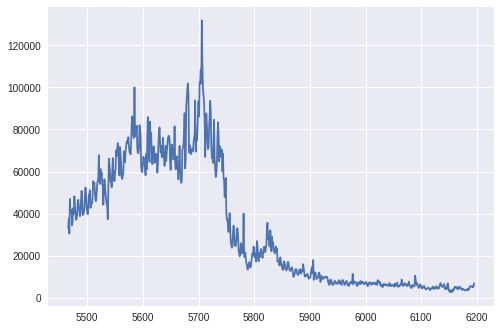

In [0]:
plt.plot(itrain.index, itrain["Number_Of_Sales"])

In [0]:
v = itrain.set_index("Datetime")

In [0]:
v.head()

,Item_ID,Category_3,Category_2,Category_1,Price,Number_Of_Sales
Datetime,,,,,,
2014-01-01,29662,0,2.0,0,1.649,33060.0
2014-01-02,29662,0,2.0,0,1.598,37546.0
2014-01-03,29662,0,2.0,0,1.476,30560.0
2014-01-04,29662,0,2.0,0,1.529,47040.0
2014-01-05,29662,0,2.0,0,1.456,40898.0


In [0]:
v["year"] = v.index.map(lambda x: pd.to_datetime(x).year) 
v["month"] = v.index.map(lambda x: pd.to_datetime(x).month) 

In [0]:
v.head()

,Item_ID,Category_3,Category_2,Category_1,Price,Number_Of_Sales,year,month
Datetime,,,,,,,,
2014-01-01,29662,0,2.0,0,1.649,33060.0,2014,1
2014-01-02,29662,0,2.0,0,1.598,37546.0,2014,1
2014-01-03,29662,0,2.0,0,1.476,30560.0,2014,1
2014-01-04,29662,0,2.0,0,1.529,47040.0,2014,1
2014-01-05,29662,0,2.0,0,1.456,40898.0,2014,1


## visualize

#### Stacked Vizualization by year

In [0]:
def stacked(target):
  plt.figure(figsize=(16, 7))
  sns.pointplot(x="month", y=target, hue="year", data=v)
  plt.xlabel("month")
  plt.ylabel("$")
  plt.title("Number_Of_Sales")
  plt.legend(loc='upper right')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


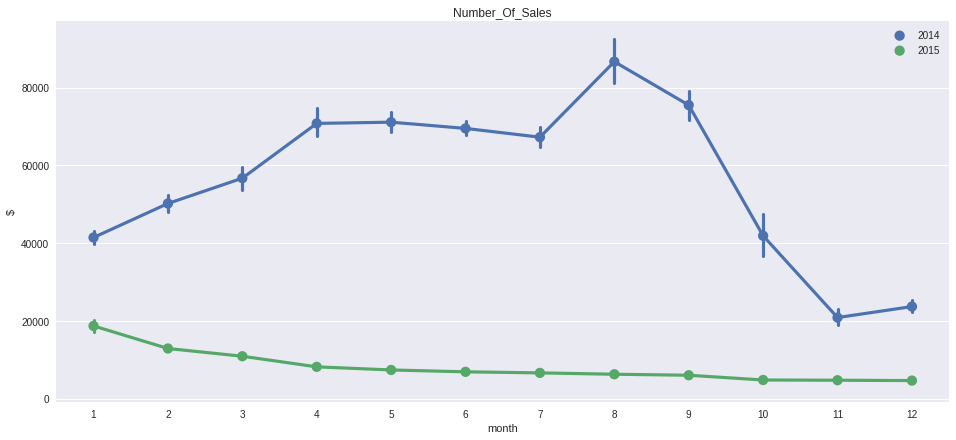

In [0]:
stacked("Number_Of_Sales")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


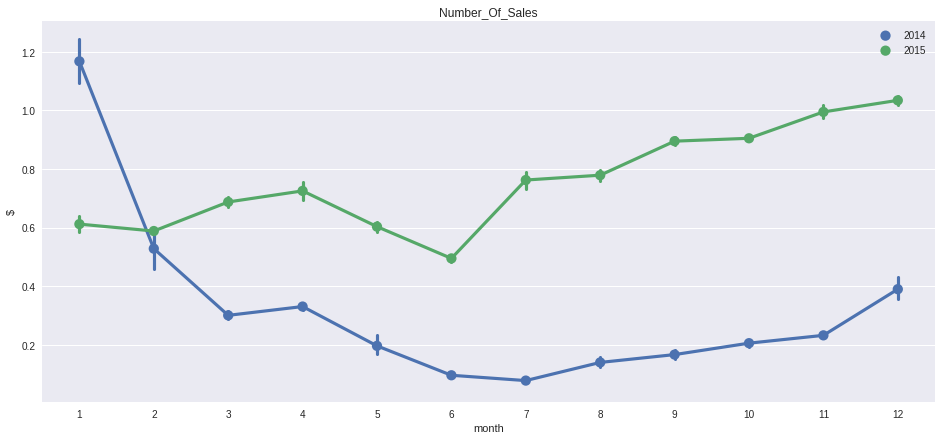

In [0]:
stacked("Price")

#### Lag plots

In [0]:
def lag_plot(target):
  from pandas.tools.plotting import lag_plot
  plot_lags = 60
  rows = int(plot_lags/5)
  cols = int(plot_lags/10)
  fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
  fig.set_figwidth(plot_lags)
  fig.set_figheight(plot_lags)
  count =1
  for i in range(rows):
      for j in range(cols):
          lag_plot(v[target], lag=count, ax=axes[i, j])
          count+=1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

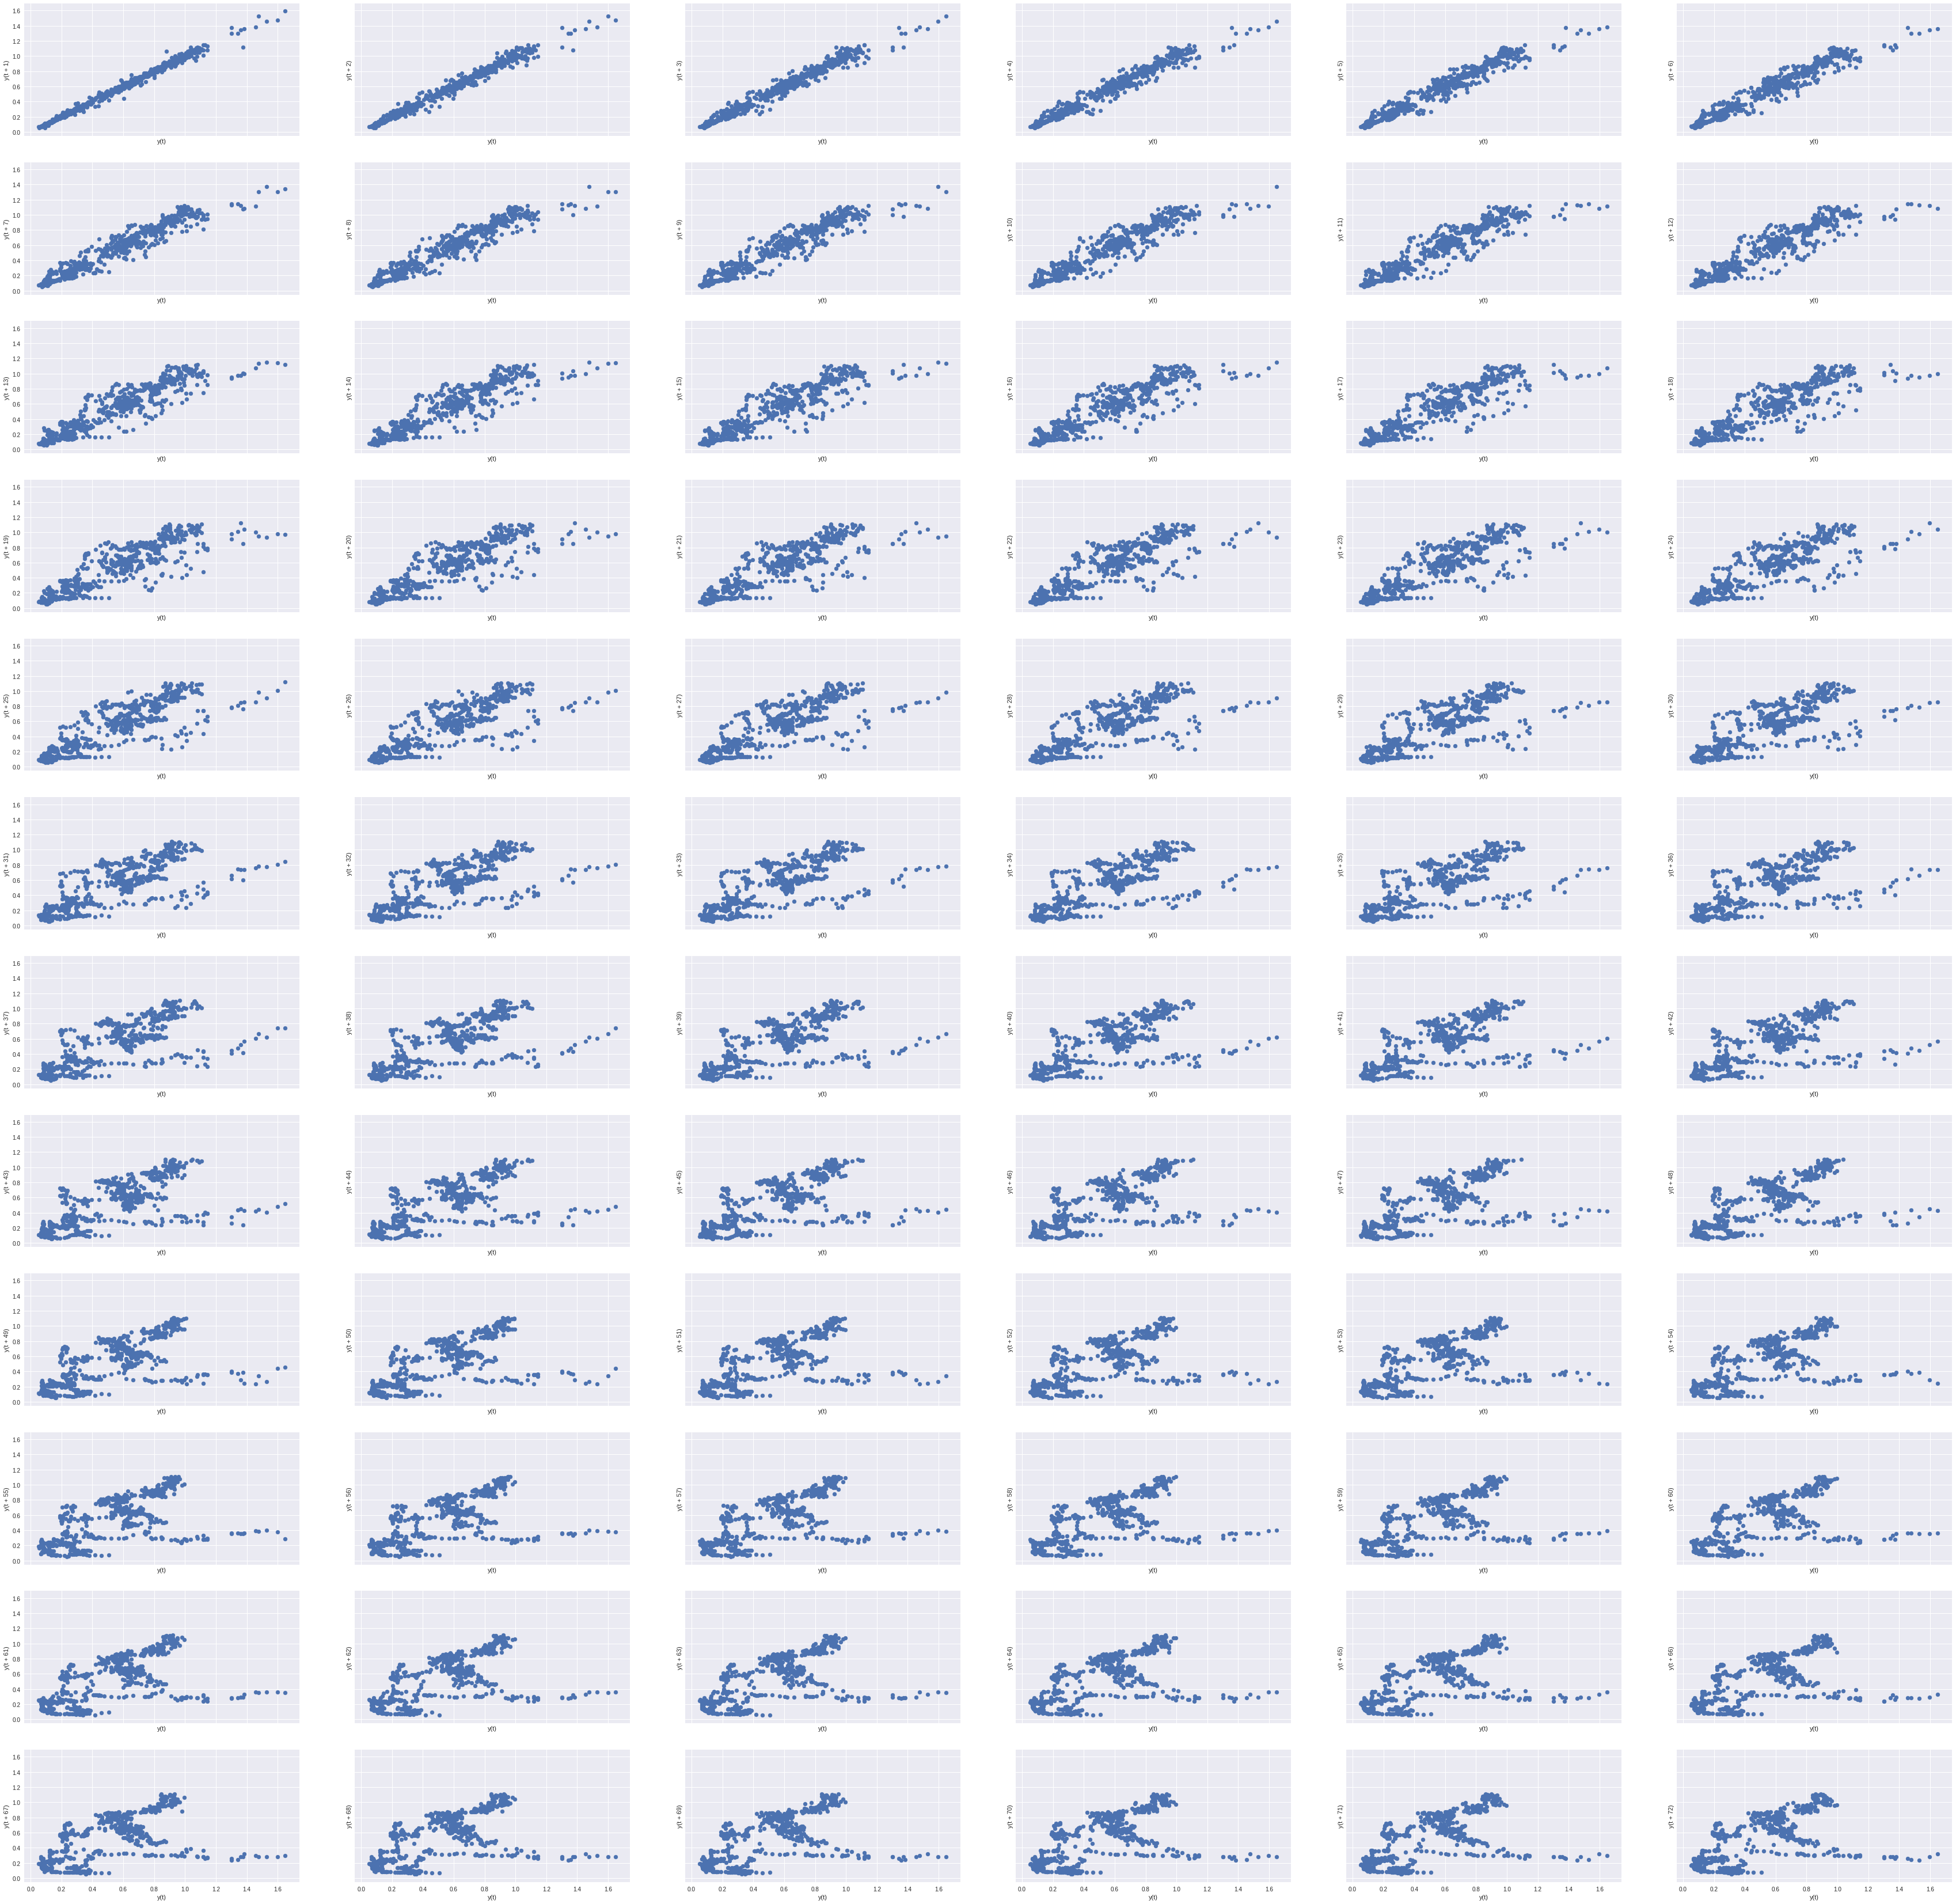

In [0]:
lag_plot("Price")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

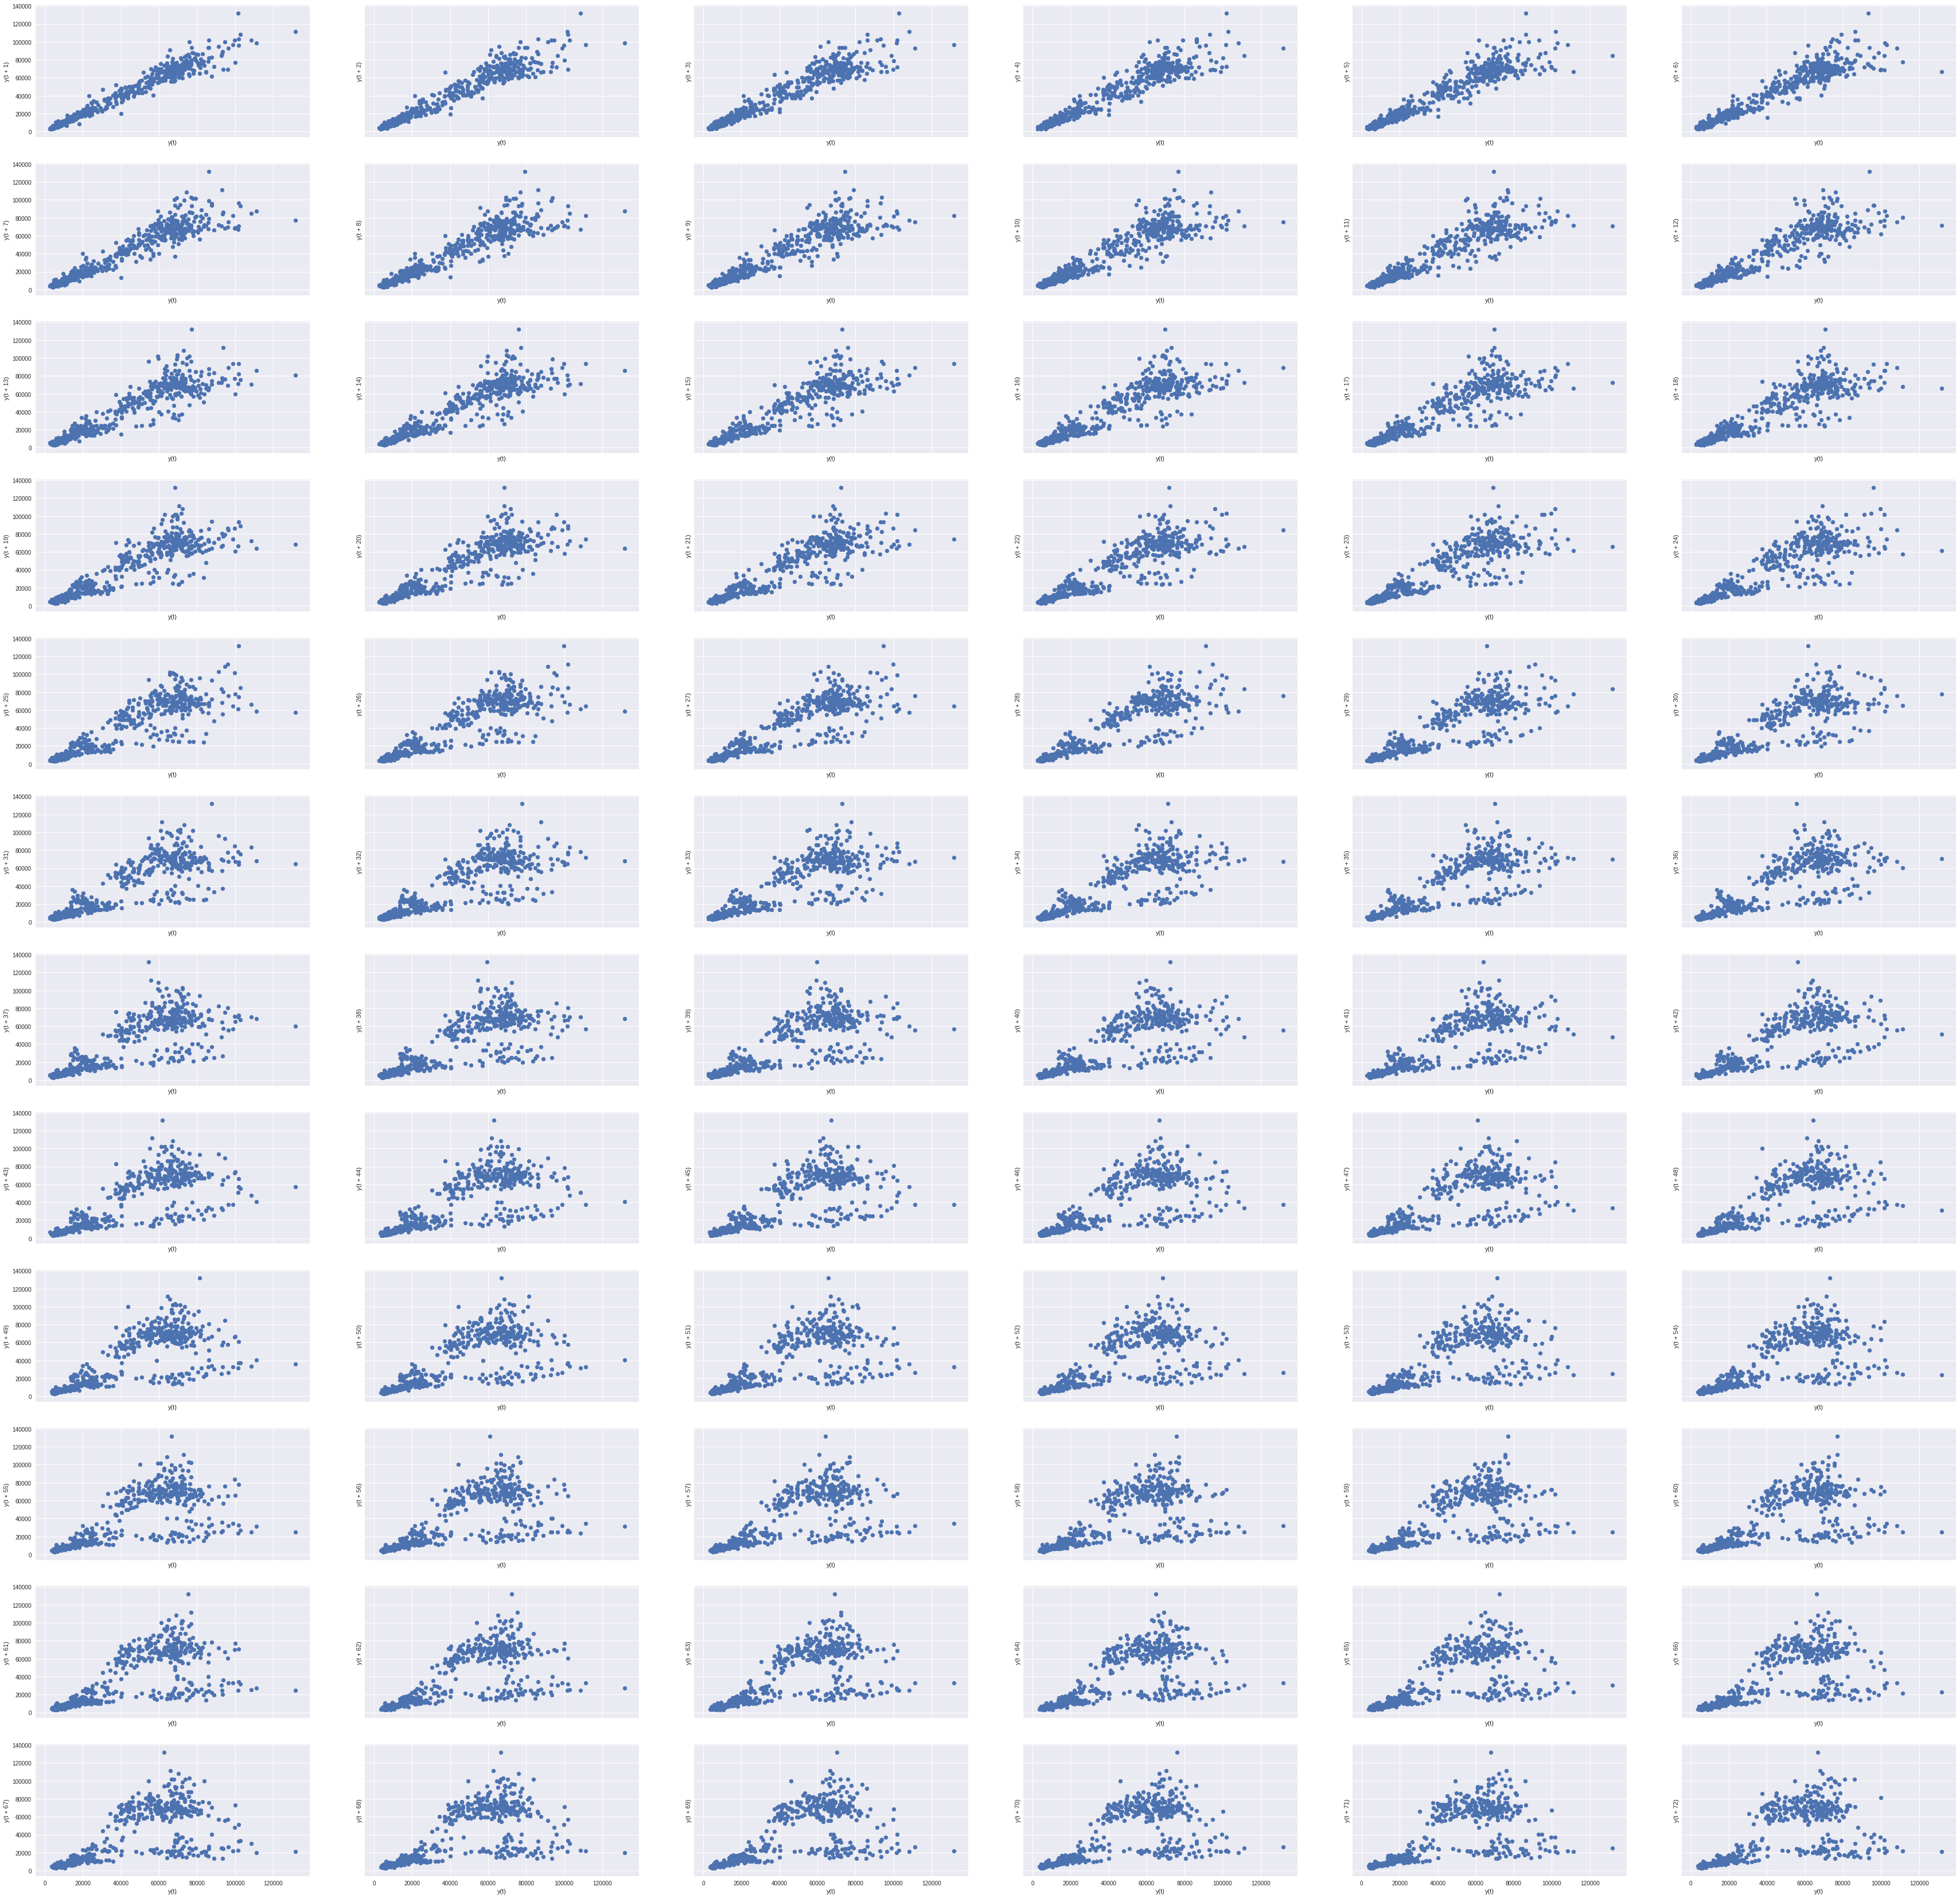

In [0]:
lag_plot("Number_Of_Sales")

#### Autocorrelation plots

In [0]:
from pandas.tools.plotting import autocorrelation_plot
def autoc(target):
  plt.figure(figsize=(16, 7))
  autocorrelation_plot(v[target])

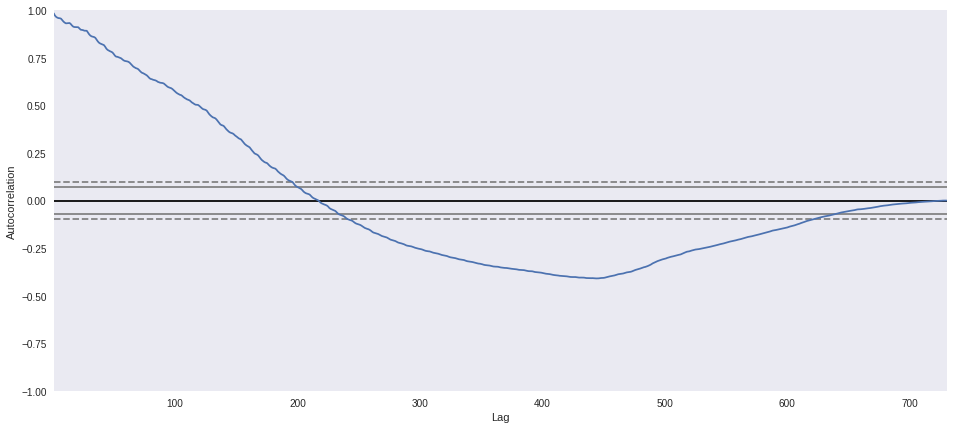

In [0]:
autoc("Number_Of_Sales")

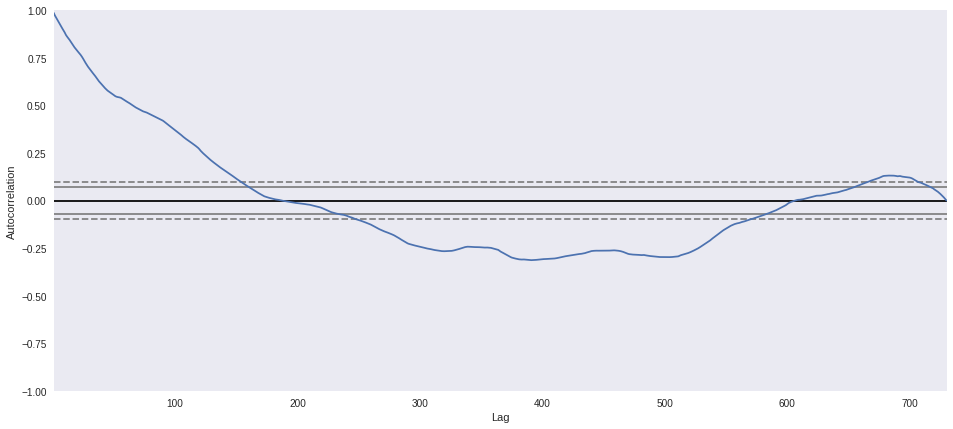

In [0]:
autoc("Price")

#### ACF PACF

In [0]:
ts = v.copy()

In [0]:
# ts['ln_Sales'] = np.log(ts.Sales+100)
ts['Price_d1'] = ts.Price.diff(1)
ts['Price_dy'] = ts.Price.diff(52)
# X_train['Sales_d14d1'] = ts.Sales.diff(14).diff(1)
# Graph data
for x in [ts.Price,ts.Price_d1,ts.Price_dy]:
    fig, axes = plt.subplots(1, 1, figsize=(15,3))
#     x=x['2014-01-01':'2014-10-01']
    ax=x.plot(ax=axes)
    ax.set_title(x.name)
    ax.title.set_fontsize(24)
    
    fig, axes = plt.subplots(1, 2, figsize=(15,3),sharex=True,sharey=True)
    sm.graphics.tsa.plot_acf(x, lags=15,ax=axes[0]);
    sm.graphics.tsa.plot_pacf(x, lags=15, ax=axes[1]);

#### Decompose

In [0]:
v.head()

,Item_ID,Category_3,Category_2,Category_1,Price,Number_Of_Sales,year,month
Datetime,,,,,,,,
2014-01-01,29662,0,2.0,0,1.649,33060.0,2014,1
2014-01-02,29662,0,2.0,0,1.598,37546.0,2014,1
2014-01-03,29662,0,2.0,0,1.476,30560.0,2014,1
2014-01-04,29662,0,2.0,0,1.529,47040.0,2014,1
2014-01-05,29662,0,2.0,0,1.456,40898.0,2014,1


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)


In [0]:
def decompose(target):
  decompose = v[target]
  decompose = decompose.reset_index()
  decompose['Datetime'] = pd.to_datetime(decompose['Datetime'])
  decompose = decompose.set_index('Datetime')
  trend = decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid
  plt.figure(figsize=(16, 7))
  plt.subplot(411)
  plt.plot(decompose[target], label='Original')
  plt.legend(loc='best')
  plt.subplot(412)
  plt.plot(trend, label='Trend')
  plt.legend(loc='best')
  plt.subplot(413)
  plt.plot(seasonal,label='Seasonality')
  plt.legend(loc='best')
  plt.subplot(414)
  plt.plot(residual, label='Residuals')
  plt.legend(loc='best')
  plt.tight_layout()

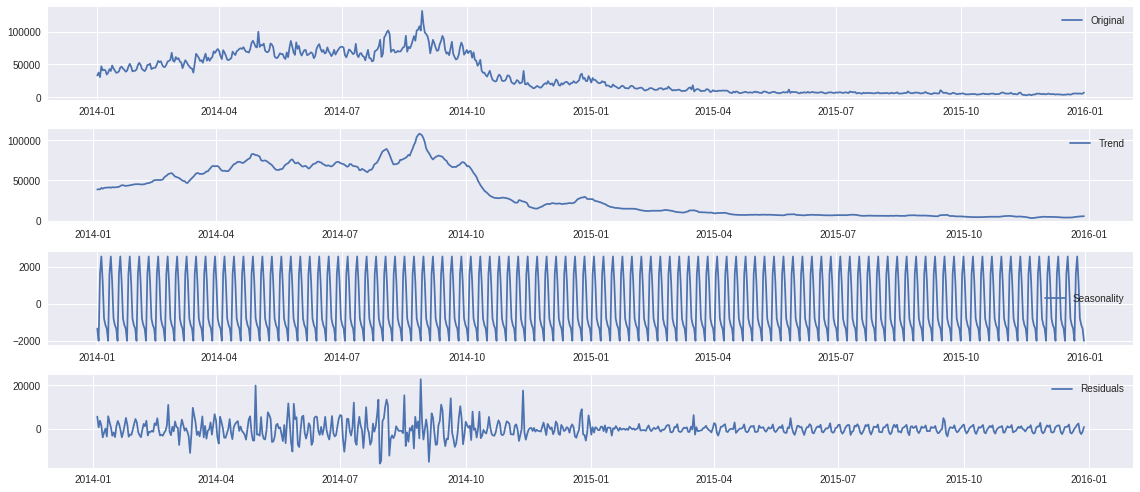

In [0]:
decompose("Number_Of_Sales")

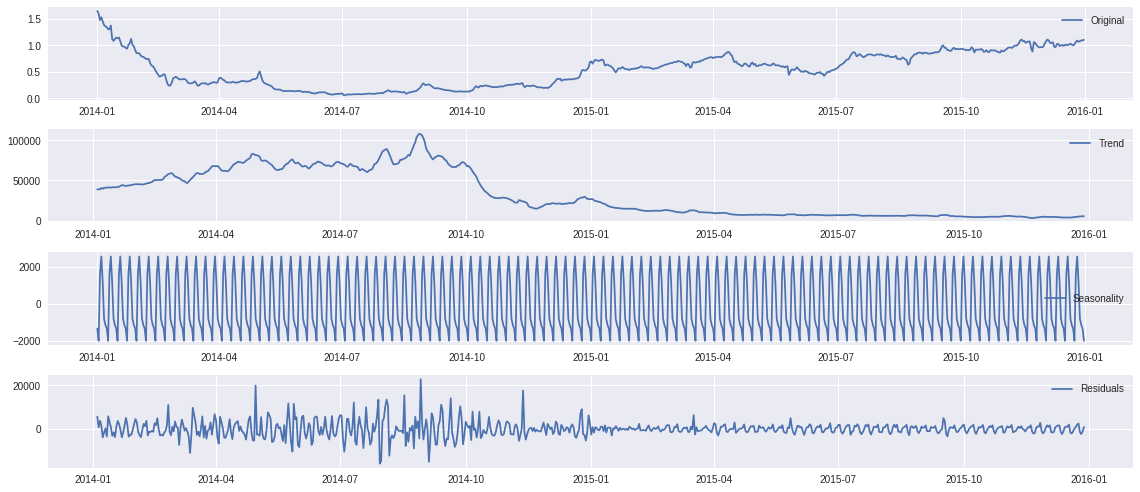

In [0]:
decompose("Price")

## Models

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
!pip install ts

  Stored in directory: /root/.cache/pip/wheels/21/63/72/2341c4dfe0ade30e93b7e2a924abb7149ee245384fd3b9a9e4
Successfully built ts


In [0]:
import ts

#### Simple Moving Avg

In [0]:
price_rmses = []
volume_rmses = []

In [0]:
final_predictions = pd.DataFrame()

In [0]:

for win in tqdm([2, 3, 4, 7, 14]):
  final_predictions = pd.DataFrame()
  for id in ids:
    train = data_train[data_train["Item_ID"] == id]
    test = data_test[data_test["Item_ID"] == id]
    da_ta = pd.concat([train, test])
    ma= da_ta.copy()
    ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=win).mean()
    y_pred = ma[ma.Datetime > "2015-12-31"]
    test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
    tes_og = test_og.copy()
    tes_og = tes_og[tes_og["Item_ID"] == id]
    final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
    if final_test.empty:
      final_predictions = final_test
    else:
      final_predictions = pd.concat([final_predictions, final_test])
    p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
#     print(id,"price rmse :",p)
    price_rmses.append((id,p))
    v = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
#     print(id,"volume rmse :",v)
    volume_rmses.append((id,v))
  price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
  volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
  print("\n")
  print("***********")
  print("window_size = ",win)
  print("Price RMSE = ",price_rmse)
  print("Volume RMSE = ",volume_rmse)
  print("***********")
  print("\n")

    

 20%|██        | 1/5 [07:00<28:00, 420.22s/it]



***********
window_size =  2
Price RMSE =  2.646205297721118
Volume RMSE =  628.9777788718911
***********




 40%|████      | 2/5 [14:00<21:01, 420.34s/it]



***********
window_size =  3
Price RMSE =  3.067218017159486
Volume RMSE =  907.3003123753449
***********




 60%|██████    | 3/5 [21:03<14:01, 420.88s/it]



***********
window_size =  4
Price RMSE =  3.2155068213639963
Volume RMSE =  1078.9556881114418
***********




In [0]:
p = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)

v = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
p,v

(3.518286232676614, 1303.727137062515)

In [0]:
final_test = test_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")

In [0]:
final_test.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
0,31375,2016-01-01,0,5.0,235,0.333,57.0,0.0,0.0
1,31375,2016-01-02,0,5.0,235,0.620,59.0,0.0,0.0
2,31375,2016-01-03,0,5.0,235,0.332,42.0,0.0,0.0
3,31375,2016-01-04,0,5.0,235,0.323,55.0,0.0,0.0
4,31375,2016-01-05,0,5.0,235,0.354,41.0,0.0,0.0


In [0]:
p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
s = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
    
print("Price rmse :",p)
print("Sales rmse :",s)

Price rmse : 0.6666566019452047
Sales rmse : 104.50341081959085


#### Exponential moving average

In [0]:
idd=29662

In [0]:

# pred = ts.ses(x_train.values, x_test.values, alpha=i, n=12)
# pred = pd.DataFrame(pred)
# pred.columns = ["yhat"]
# pred.index = tss.index
# measure = math.pow(mean_squared_error(x_test.values, pred[pred.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)].values), 0.5)
# print("alpha: {} RMSE:{}".format(i,measure))

In [0]:
train = data_train[data_train["Item_ID"] == idd]
train.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
5466,29662,2014-01-01,0,2.0,0,1.649,33060.0
5467,29662,2014-01-02,0,2.0,0,1.598,37546.0
5468,29662,2014-01-03,0,2.0,0,1.476,30560.0
5469,29662,2014-01-04,0,2.0,0,1.529,47040.0
5470,29662,2014-01-05,0,2.0,0,1.456,40898.0


In [0]:
test = data_test[data_test["Item_ID"] == idd]
test.head()


,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
6196,29662,2016-01-01,0,2.0,0,1.111,4960.0
6197,29662,2016-01-02,0,2.0,0,1.098,5698.0
6198,29662,2016-01-03,0,2.0,0,1.077,5054.0
6199,29662,2016-01-04,0,2.0,0,1.075,4606.0
6200,29662,2016-01-05,0,2.0,0,1.114,4756.0


In [0]:
da_ta = pd.concat([train, test])
da_ta.head()


,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
5466,29662,2014-01-01,0,2.0,0,1.649,33060.0
5467,29662,2014-01-02,0,2.0,0,1.598,37546.0
5468,29662,2014-01-03,0,2.0,0,1.476,30560.0
5469,29662,2014-01-04,0,2.0,0,1.529,47040.0
5470,29662,2014-01-05,0,2.0,0,1.456,40898.0


In [0]:
ma= da_ta.copy()


In [0]:
da_ta["Price"]

5466    1.649
5467    1.598
5468    1.476
5469    1.529
5470    1.456
5471    1.382
5472    1.359
5473    1.343
5474    1.302
5475    1.301
5476    1.374
5477    1.117
5478    1.082
5479    1.120
5480    1.144
5481    1.131
5482    1.146
5483    1.076
5484    0.996
5485    0.974
5486    0.976
5487    0.949
5488    0.936
5489    1.005
5490    1.038
5491    1.120
5492    1.009
5493    0.981
5494    0.909
5495    0.851
        ...  
6347    1.300
6348    1.300
6349    1.313
6350    1.328
6351    1.365
6352    1.333
6353    1.293
6354    1.292
6355    1.298
6356    1.328
6357    1.408
6358    1.379
6359    1.342
6360    1.280
6361    1.238
6362    1.257
6363    1.249
6364    1.242
6365    1.274
6366    1.204
6367    1.162
6368    1.150
6369    1.144
6370    1.086
6371    1.056
6372    1.029
6373    1.035
6374    1.054
6375    1.037
6376    0.988
Name: Price, Length: 911, dtype: float64

In [0]:
da_ta[["Price", "Number_Of_Sales"]].shift(1)

,Price,Number_Of_Sales
5466,NaN,NaN
5467,1.649,33060.0
5468,1.598,37546.0
5469,1.476,30560.0
5470,1.529,47040.0
5471,1.456,40898.0
5472,1.382,41892.0
5473,1.359,40996.0
5474,1.343,34444.0
5475,1.302,37092.0


In [0]:
da_ta[["Price", "Number_Of_Sales"]].shift(1)

In [0]:
ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].shift(1)
ma.head()


In [0]:
y_pred = ma[ma.Datetime > "2015-12-31"]
y_pred.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
6196,29662,2016-01-01,0,2.0,0,1.0708,5515.0
6197,29662,2016-01-02,0,2.0,0,1.0809,5543.6
6198,29662,2016-01-03,0,2.0,0,1.0868,5500.2
6199,29662,2016-01-04,0,2.0,0,1.0881,5410.4
6200,29662,2016-01-05,0,2.0,0,1.0906,5331.6


In [0]:
test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
test.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
6196,29662,2016-01-01,0,2.0,0,1.0708,5515.0
6197,29662,2016-01-02,0,2.0,0,1.0809,5543.6
6198,29662,2016-01-03,0,2.0,0,1.0868,5500.2
6199,29662,2016-01-04,0,2.0,0,1.0881,5410.4
6200,29662,2016-01-05,0,2.0,0,1.0906,5331.6


In [0]:
tes_og = test_og.copy()
tes_og = tes_og[tes_og["Item_ID"] == idd]
tes_og.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
6196,29662,2016-01-01,0,2.0,0,1.111,4960.0
6197,29662,2016-01-02,0,2.0,0,1.098,5698.0
6198,29662,2016-01-03,0,2.0,0,1.077,5054.0
6199,29662,2016-01-04,0,2.0,0,1.075,4606.0
6200,29662,2016-01-05,0,2.0,0,1.114,4756.0


In [0]:
final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")

In [0]:
final_test.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
0,29662,2016-01-01,0,2.0,0,1.111,4960.0,1.0708,5515.0
1,29662,2016-01-02,0,2.0,0,1.098,5698.0,1.0809,5543.6
2,29662,2016-01-03,0,2.0,0,1.077,5054.0,1.0868,5500.2
3,29662,2016-01-04,0,2.0,0,1.075,4606.0,1.0881,5410.4
4,29662,2016-01-05,0,2.0,0,1.114,4756.0,1.0906,5331.6


In [0]:
p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
s = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
    
print("Price rmse :",p)
print("Sales rmse :",s)

Price rmse : 0.4980306481637618
Sales rmse : 32.51157538518343


In [0]:
# ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=win).mean()
# y_pred = ma[ma.Datetime > "2015-12-31"]
# test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
# tes_og = test_og.copy()
# tes_og = tes_og[tes_og["Item_ID"] == idd]
# final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")

In [0]:
!pip install ts

In [0]:
import ts

AttributeError: ignored

## AR

In [0]:
# ts['ln_Sales'] = np.log(ts.Sales+100)
ts['Sales_d1'] = ts.Weekly_Sales.diff(1)
ts['Sales_dy'] = ts.Weekly_Sales.diff(52)
# X_train['Sales_d14d1'] = ts.Sales.diff(14).diff(1)
# Graph data
for x in [ts.Weekly_Sales,ts.Sales_d1,ts.Sales_dy]:
    fig, axes = plt.subplots(1, 1, figsize=(15,3))
#     x=x['2014-01-01':'2014-10-01']
    ax=x.plot(ax=axes)
    ax.set_title(x.name)
    ax.title.set_fontsize(24)
    
    fig, axes = plt.subplots(1, 2, figsize=(15,3),sharex=True,sharey=True)
    sm.graphics.tsa.plot_acf(x, lags=15,ax=axes[0]);
    sm.graphics.tsa.plot_pacf(x, lags=15, ax=axes[1]);

In [0]:
train = data_train[data_train["Item_ID"] == idd]
test = data_test[data_test["Item_ID"] == idd]
da_ta = pd.concat([train, test])
ma= da_ta.copy()


In [0]:
import statsmodels.api as sm

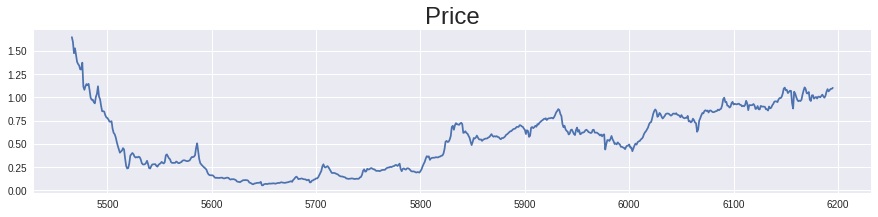

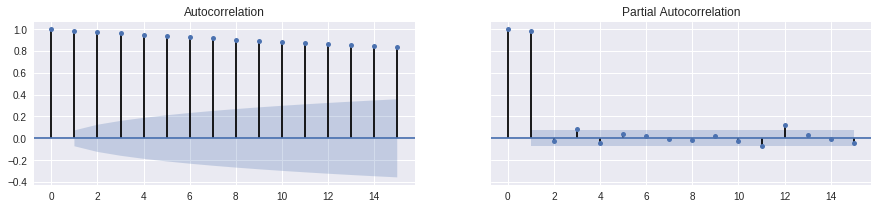

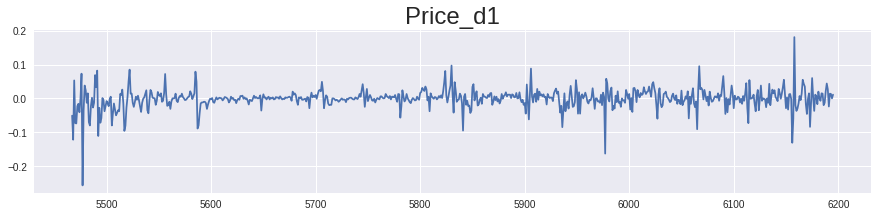

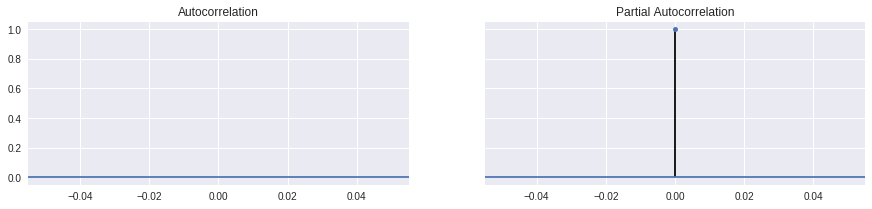

In [0]:
train["Price_d1"] = train.Price.diff(1)
# train["Number_Of_Sales_d1"] = train.Number_Of_Sales.diff(1)
for x in [train.Price, train.Price_d1]:
  fig, axes = plt.subplots(1, 1, figsize=(15,3))
  ax=x.plot(ax=axes)
  ax.set_title(x.name)
  ax.title.set_fontsize(24)
  fig, axes = plt.subplots(1, 2, figsize=(15,3),sharex=True,sharey=True)
  sm.graphics.tsa.plot_acf(x, lags=15,ax=axes[0]);
  sm.graphics.tsa.plot_pacf(x, lags=15, ax=axes[1]);  

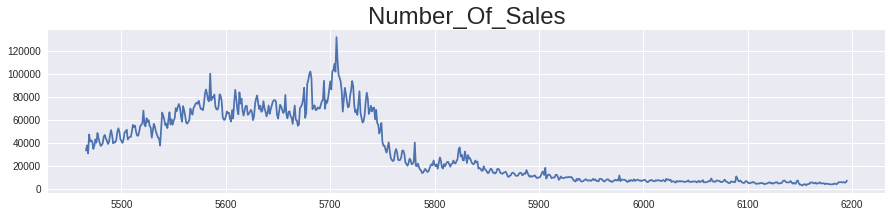

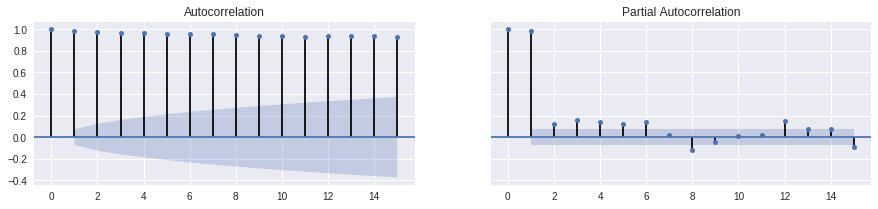

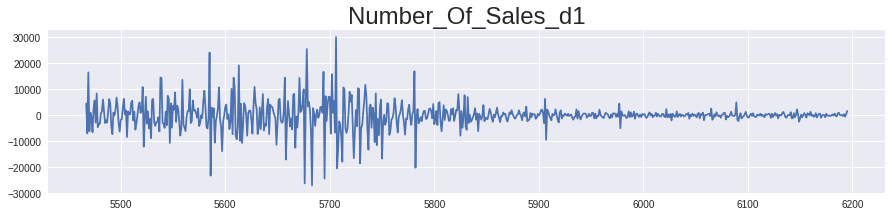

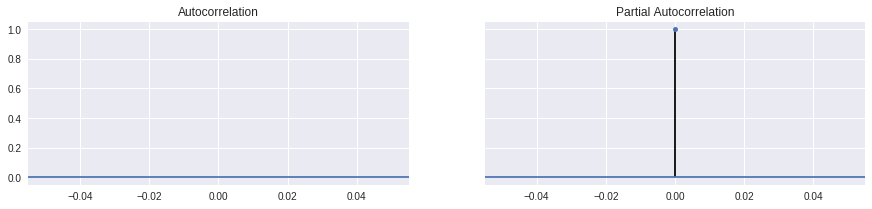

In [0]:
# train["Price_d1"] = train.Price.diff(1)
train["Number_Of_Sales_d1"] = train.Number_Of_Sales.diff(1)
for x in [train.Number_Of_Sales, train.Number_Of_Sales_d1]:
  fig, axes = plt.subplots(1, 1, figsize=(15,3))
  ax=x.plot(ax=axes)
  ax.set_title(x.name)
  ax.title.set_fontsize(24)
  fig, axes = plt.subplots(1, 2, figsize=(15,3),sharex=True,sharey=True)
  sm.graphics.tsa.plot_acf(x, lags=15,ax=axes[0]);
  sm.graphics.tsa.plot_pacf(x, lags=15, ax=axes[1]);  

In [0]:
train.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales,Price_d1,Number_Of_Sales_d1
5466,29662,2014-01-01,0,2.0,0,1.649,33060.0,NaN,NaN
5467,29662,2014-01-02,0,2.0,0,1.598,37546.0,-0.051,4486.0
5468,29662,2014-01-03,0,2.0,0,1.476,30560.0,-0.122,-6986.0
5469,29662,2014-01-04,0,2.0,0,1.529,47040.0,0.053,16480.0
5470,29662,2014-01-05,0,2.0,0,1.456,40898.0,-0.073,-6142.0


In [0]:
train_ar = train.set_index("Datetime")

In [0]:
train_ar_price = train_ar.Price

In [0]:
train_ar_price.head()

Datetime
2014-01-01    1.649
2014-01-02    1.598
2014-01-03    1.476
2014-01-04    1.529
2014-01-05    1.456
Name: Price, dtype: float64

In [0]:
from statsmodels.tsa.arima_model import ARIMA


In [0]:
%%time


q=[0,1]
d=[0,1]
p=[0,1,2,3]

import itertools
orders=list(itertools.product(p,d,q))
counter=len(orders)
res={}
for (p,d,q) in orders:
    arma = ARIMA(train_ar_price, order=(p,d,q))
    try:
        arma = arma.fit(method='lbfgs',maxiter=50)
        res[(p,d,q)]=(arma.aic,arma.bic)
        counter-=1
        print('finish {}, {} remains'.format((p,d,q),counter))
    except:
        print('order {} fail'.format((p,d,q)))

finish (0, 0, 0), 15 remains
order (0, 0, 1) fail
finish (0, 1, 0), 14 remains
order (0, 1, 1) fail
order (1, 0, 0) fail
order (1, 0, 1) fail
order (1, 1, 0) fail
order (1, 1, 1) fail
order (2, 0, 0) fail
order (2, 0, 1) fail
order (2, 1, 0) fail
order (2, 1, 1) fail
order (3, 0, 0) fail
order (3, 0, 1) fail
order (3, 1, 0) fail
order (3, 1, 1) fail
CPU times: user 484 ms, sys: 376 ms, total: 860 ms
Wall time: 695 ms


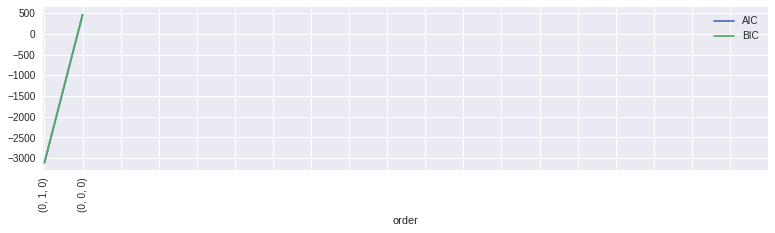

In [0]:
df=pd.DataFrame([ (k, v[0],v[1]) for k,v in res.items()],columns=['order','AIC','BIC'])
df=df.sort_values('AIC').set_index('order')
n=20
ax=df[:n].plot(rot=90)
ax.set_xticks(range(n))
ax.set_xticklabels(df[:n].index.values);
ax.figure.set_size_inches(13,3)

In [0]:
arma_price = ARIMA(train_ar_price, order=(0,1,0)) 

In [0]:
arma_price_fit = arma_price.fit(disp=0)

In [0]:
arma_price_fit

In [0]:
# print(arma_price_fit.summary())

In [0]:
from datetime import datetime

In [0]:
pred = arma_price_fit.predict(start=datetime(2016, 1, 1), end=datetime(2016,6,29))


In [0]:
pred

2016-01-01   -0.000749
2016-01-02   -0.000749
2016-01-03   -0.000749
2016-01-04   -0.000749
2016-01-05   -0.000749
2016-01-06   -0.000749
2016-01-07   -0.000749
2016-01-08   -0.000749
2016-01-09   -0.000749
2016-01-10   -0.000749
2016-01-11   -0.000749
2016-01-12   -0.000749
2016-01-13   -0.000749
2016-01-14   -0.000749
2016-01-15   -0.000749
2016-01-16   -0.000749
2016-01-17   -0.000749
2016-01-18   -0.000749
2016-01-19   -0.000749
2016-01-20   -0.000749
2016-01-21   -0.000749
2016-01-22   -0.000749
2016-01-23   -0.000749
2016-01-24   -0.000749
2016-01-25   -0.000749
2016-01-26   -0.000749
2016-01-27   -0.000749
2016-01-28   -0.000749
2016-01-29   -0.000749
2016-01-30   -0.000749
                ...   
2016-05-31   -0.000749
2016-06-01   -0.000749
2016-06-02   -0.000749
2016-06-03   -0.000749
2016-06-04   -0.000749
2016-06-05   -0.000749
2016-06-06   -0.000749
2016-06-07   -0.000749
2016-06-08   -0.000749
2016-06-09   -0.000749
2016-06-10   -0.000749
2016-06-11   -0.000749
2016-06-12 

In [0]:
test_og.tail()


,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
491028,30268,2016-06-29,1,4.0,344,0.912,32.0
901889,30766,2016-06-29,0,3.0,2,0.156,1362.0
1187943,31123,2016-06-29,0,3.0,187,0.442,1202.0
1062225,30966,2016-06-29,0,5.0,155,0.829,244.0
1392918,31375,2016-06-29,0,5.0,235,0.124,138.0


In [0]:
ar_model = sm.tsa.AR(df, missing='drop', freq='D')
ar_res = ar_model.fit(maxlag=9, method='mle', disp=-1)
pred = ar_res.predict(start='2016', end='2016')

In [0]:
ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].ewm(alpha= alp, min_periods = win).mean()
y_pred = ma[ma.Datetime > "2015-12-31"]
test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
tes_og = test_og.copy()
tes_og = tes_og[tes_og["Item_ID"] == idd]
final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")

In [0]:
import itertools

In [0]:
itertools.product(p,d,q,P,D,Q,s)

NameError: ignored